Gates' full, raw (unedited) code
Reference: Professor Ami Gates, Dept. Applied Math, Data Science, University of Colorado

[Dr. Gates' Website](https://gatesboltonanalytics.com/?page_id=898)

---

**Image Processing Python**

<https://note.nkmk.me/en/python-numpy-image-processing/>


In [1]:
# libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd

# The dataset for this code

*CIFAR-10* dataset consists of 60000, $32 \times 32$, color images in 10 classes, with 6000 images per class.

- <https://www.cs.toronto.edu/~kriz/cifar.html>
- <https://keras.io/api/datasets/cifar10/>

How to read it in...
```
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
```


In [2]:
plt.rcParams["figure.figsize"] = (5,5)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
print(type(train_images))
print(train_images.shape)   ## 50000 rows, 32 by 32, depth 3 (because RGB) 

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


50000 rows, 32 by 32, depth 3 (because RGB)

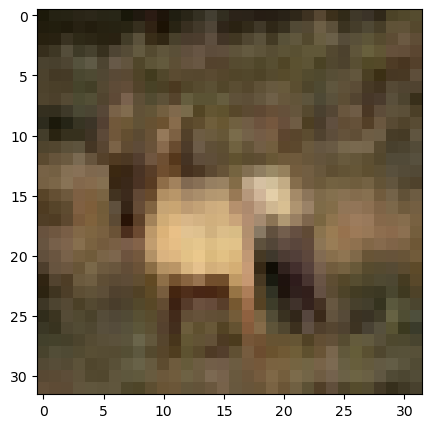

In [4]:
# (50000, 32, 32, 3)
plt.imshow(train_images[3])

In [5]:
## Set the input shape
input_shape=train_images.shape
print("The input shape for the training images is\n", input_shape) ## (50000, 32, 32, 3)

The input shape for the training images is
 (50000, 32, 32, 3)


In [6]:
print("The input shape per image is\n", input_shape[1:]) ## (32, 32, 3)  

The input shape per image is
 (32, 32, 3)


- The "3" is because this has 3 channels (RGB)
- color channels refers to (R,G,B)


In [7]:
print("A single image, R of RGB, has a matrix like this:\n", train_images[0,:,:,0])
print("A single image has shape\n", train_images[0,:,:,0].shape)
print(train_images[0,:,:,2].shape)

A single image, R of RGB, has a matrix like this:
 [[ 59  43  50 ... 158 152 148]
 [ 16   0  18 ... 123 119 122]
 [ 25  16  49 ... 118 120 109]
 ...
 [208 201 198 ... 160  56  53]
 [180 173 186 ... 184  97  83]
 [177 168 179 ... 216 151 123]]
A single image has shape
 (32, 32)
(32, 32)


## Normalize pixel values to be between 0 and 1

In [8]:
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Print out  a visual of all the image categories

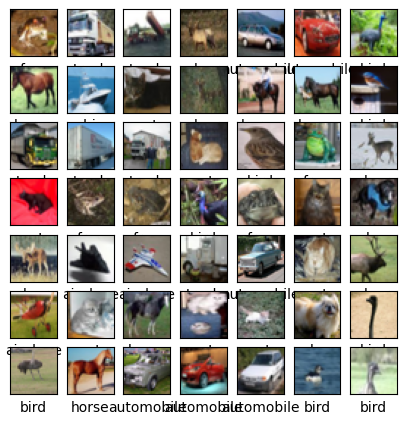

In [9]:
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the CNN Model 

In [10]:
CNN_Model = tf.keras.models.Sequential([
    #https://keras.io/api/layers/convolution_layers/convolution2d/
  tf.keras.layers.Conv2D(input_shape=input_shape[1:], kernel_size=(3,3), filters=32, activation="relu"), 
  ## A CNN takes tensors of shape (image_height, image_width, color_channels)
        ## input_shape[1:] means all but the first value. Here, our input is: ()
        ## https://www.tensorflow.org/api_docs/python/tf/keras/activations
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  #https://keras.io/api/layers/pooling_layers/max_pooling2d/
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  #tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  
  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(64, activation='relu'), 
  ## https://keras.io/api/layers/core_layers/dense/
  ## https://www.tutorialspoint.com/keras/keras_dense_layer.htm
  
  tf.keras.layers.Dense(10) 
])

**Links referenced in the above code (all specifically for *Keras*):**

- Convolution layers: <https://keras.io/api/layers/convolution_layers/convolution2d/>
- Activation functions: <https://www.tensorflow.org/api_docs/python/tf/keras/activations>
- `MaxPooling2D`: <https://keras.io/api/layers/pooling_layers/max_pooling2d/>
- Dense layers
    - <https://keras.io/api/layers/core_layers/dense/>
    - <https://www.tutorialspoint.com/keras/keras_dense_layer.htm>


In [11]:
CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

## Compile the model

In [12]:
CNN_Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              ## Using True above means you do not use one-hot-encoding
              metrics=['accuracy'])

## Fit the model
(Can increase epochs to improve accuracy/training)

In [13]:
history = CNN_Model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5002 - accuracy: 0.4592 - val_loss: 1.2472 - val_accuracy: 0.5643
Epoch 2/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1396 - accuracy: 0.5982 - val_loss: 1.0604 - val_accuracy: 0.6345
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0121 - accuracy: 0.6480 - val_loss: 0.9944 - val_accuracy: 0.6552
Epoch 4/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9394 - accuracy: 0.6743 - val_loss: 0.9792 - val_accuracy: 0.6637
Epoch 5/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8809 - accuracy: 0.6944 - val_loss: 0.9364 - val_accuracy: 0.6785
Epoch 6/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8334 - accuracy: 0.7120 - val_loss: 0.9235 - val_accuracy: 0.6823
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7843 - accuracy: 0.7279 - val_loss: 0.9012 -

## Evaluate the model performance

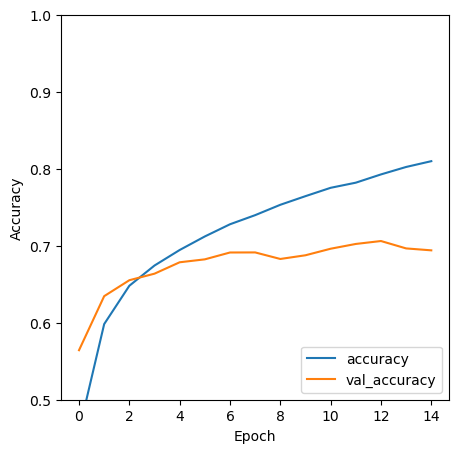

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [15]:
test_loss, test_acc = CNN_Model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

313/313 - 2s - loss: 0.9838 - accuracy: 0.6940 - 2s/epoch - 7ms/step
0.6940000057220459


## Predictions

In [16]:
CNNpredictions=CNN_Model.predict([test_images])
print(CNNpredictions[:6,:])
print(CNNpredictions.shape)

313/313 [==============================] - 3s 7ms/step
[[ 0.22624633 -6.562735   -1.2500533   6.3979464  -5.4030304   3.1768541
  -0.46076846 -5.4895444   5.9910493  -5.034677  ]
 [ 5.971999    6.006872   -4.6059484  -2.413846   -9.2478285  -7.888016
  -9.00575    -7.2312684  13.233358    3.7723393 ]
 [ 3.1501844   4.2839003  -1.8958777   0.5962222  -5.381745   -2.8783104
  -3.5247862  -2.9045      4.83457     1.1363444 ]
 [ 6.1331096   1.249285   -0.27116698  1.3791207  -2.5800216  -5.6724505
  -1.3090563  -4.1219797   3.6117702  -1.4290131 ]
 [-7.2056575  -6.9358187   2.3247123   2.8835754   6.738723   -0.6732777
   6.397046   -3.4931226  -3.5519714  -5.2166886 ]
 [-5.949218   -5.9886675   0.49725375  2.4373577   0.5440219   1.288848
   7.78829    -2.8904848  -4.4328475  -3.8484073 ]]
(10000, 10)


### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
Pred_Max_Values = np.squeeze(np.array(CNNpredictions.argmax(axis=1)))
print(Pred_Max_Values)
CNN_CM=confusion_matrix(Pred_Max_Values, test_labels)
print(CNN_CM)

[3 8 8 ... 5 1 7]
[[699  16  44  13  18   8   4  14  42  26]
 [ 17 820   4  12   3   3   4   1  25  84]
 [ 75  11 617  77 102  94  35  67  18  19]
 [ 29   9  74 531  88 192  36  74  22  22]
 [ 17   7  59  54 561  34  20  65   2   8]
 [  3   5  43 126  23 538   9  49   4   7]
 [ 18  18 109 128 132  63 879  19  12  16]
 [  6   2  25  22  52  49   4 689   5  13]
 [105  41  16  23  17  14   5   3 850  49]
 [ 31  71   9  14   4   5   4  19  20 756]]


### Pretty Confusion Matrix

[Text(0, 0.5, 'airplane'),
 Text(0, 1.5, 'automobile'),
 Text(0, 2.5, 'bird'),
 Text(0, 3.5, 'cat'),
 Text(0, 4.5, 'deer'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'frog'),
 Text(0, 7.5, 'horse'),
 Text(0, 8.5, 'ship'),
 Text(0, 9.5, 'truck')]

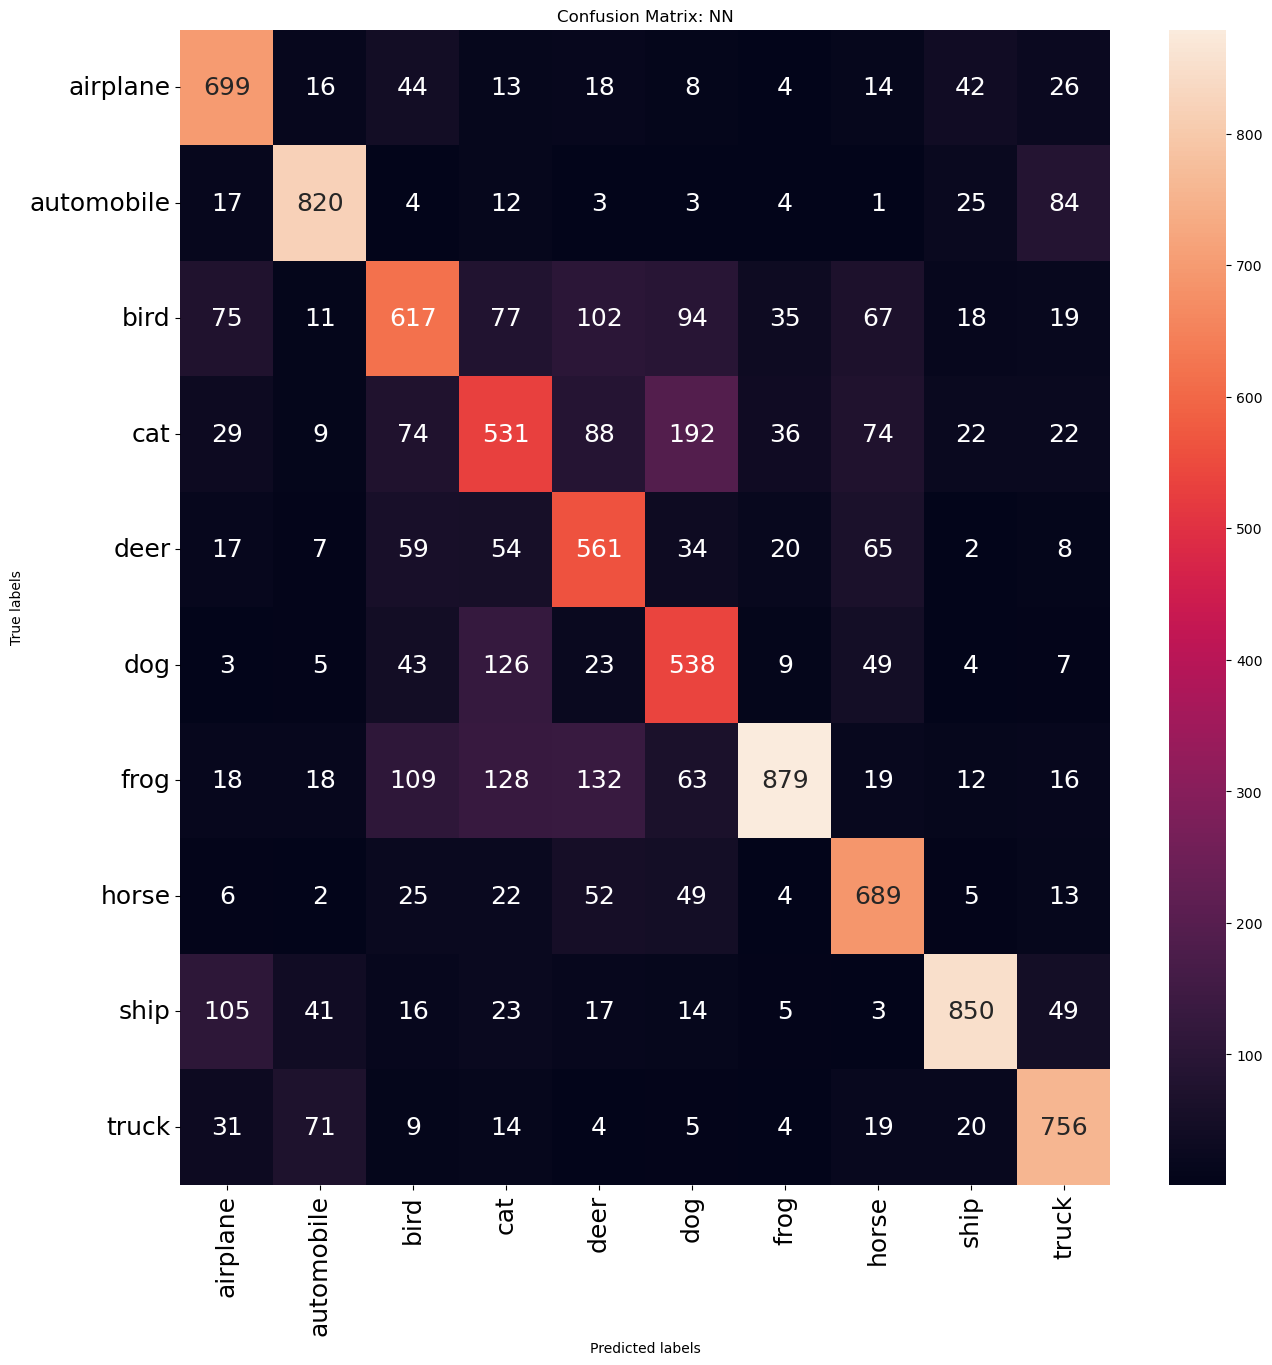

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt     

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(CNN_CM, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws is size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: NN') 
ax.xaxis.set_ticklabels(class_names,rotation=90, fontsize = 18)
ax.yaxis.set_ticklabels(class_names,rotation=0, fontsize = 18)